![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [113]:
# Import libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import numpy as np

# Start your code here!

In [114]:
# Load Data and merge them into one dataset
import pandas as pd  # Ensure pandas is imported

telecom_demographics_df = pd.read_csv('telecom_demographics.csv')
telecom_usage_df = pd.read_csv('telecom_usage.csv')

# Info
print("telecom_demographics_df info:")
telecom_demographics_df.info()
print("\ntelecom_usage_df info:")
telecom_usage_df.info()

# Merge 
churn_df = telecom_demographics_df.merge(telecom_usage_df, how='inner')

telecom_demographics_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 507.9+ KB

telecom_usage_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  6500 no

In [115]:
df = churn_df.copy()

# Show the fields and data types of the data frame
print(df.info())

# Show Head
print(df.head())

# Show statisitcs for the df
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 761.7+ KB
None
   customer_id telecom_partner gender  ...  sms_sent data_used churn

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,121035.576923,46.108615,548955.907077,1.982308,85529.193385,49.789538,24.257846,5000.956308,0.200462
std,70353.990092,16.443712,259874.312026,1.404659,37545.639180,29.799221,14.650736,2940.611928,0.400377
min,47.000000,18.000000,100045.000000,0.000000,20001.000000,-10.000000,-5.000000,-969.000000,0.000000
25%,60125.750000,32.000000,321550.000000,1.000000,52905.000000,25.000000,12.000000,2493.750000,0.000000
50%,120470.500000,46.000000,550163.500000,2.000000,85286.500000,50.000000,25.000000,4975.500000,0.000000
75%,181420.750000,60.000000,775155.500000,3.000000,118817.500000,75.000000,37.000000,7504.250000,0.000000
max,243505.000000,74.000000,999740.000000,4.000000,149977.000000,108.000000,53.000000,10919.000000,1.000000


In [116]:
## Define the target variable in the df
target = 'churn'
print(f'The target variable is {target}')

The target variable is churn


Frequency of the target
The target variable contains 2 unique values
0    5197
1    1303
Name: churn, dtype: int64


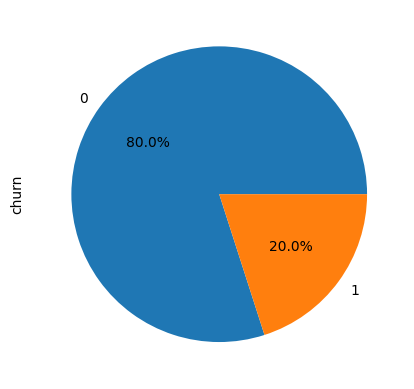

In [117]:
# Show the frequency of the target variable
df[target].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

# Print Frequency
print('Frequency of the target')
print('The target variable contains {} unique values'.format(len(df[target].unique())))
print(df[target].value_counts())

In [118]:
# Create a list of objects
object_list=[element for element in df.columns if df[element].dtype=='object']    
print(object_list)

# Describe the objects
df[object_list].describe()

['telecom_partner', 'gender', 'state', 'city', 'registration_event']


,telecom_partner,gender,state,city,registration_event
count,6500,6500,6500,6500,6500
unique,4,2,28,6,1216
top,Reliance Jio,M,Karnataka,Delhi,2021-04-04
freq,1658,3909,260,1128,14


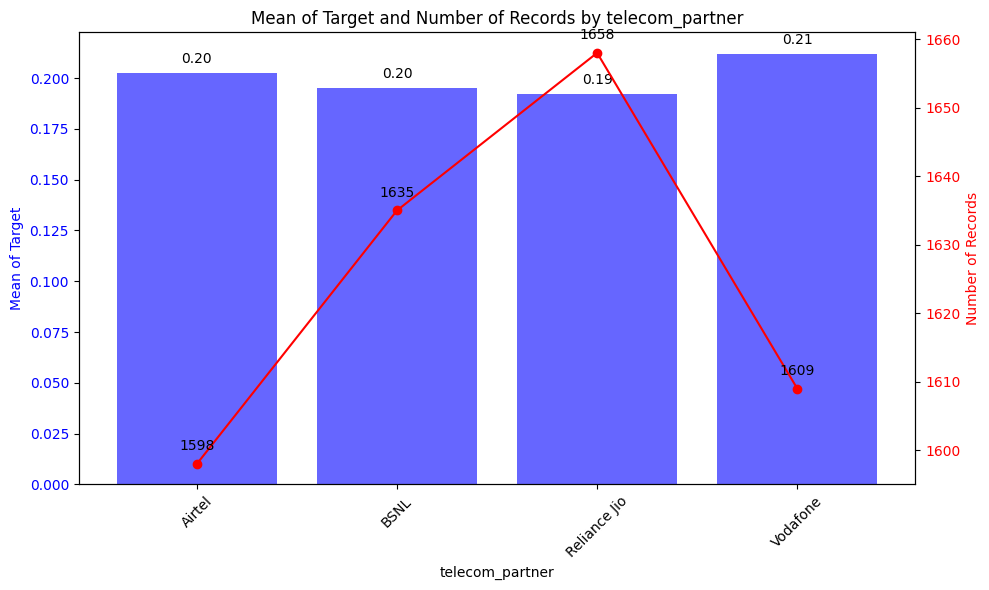

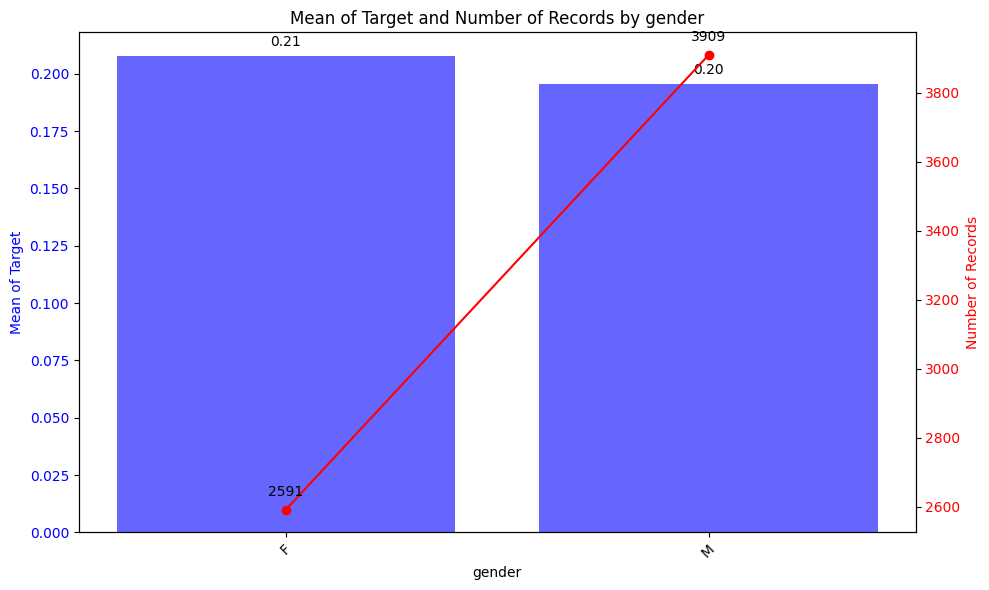

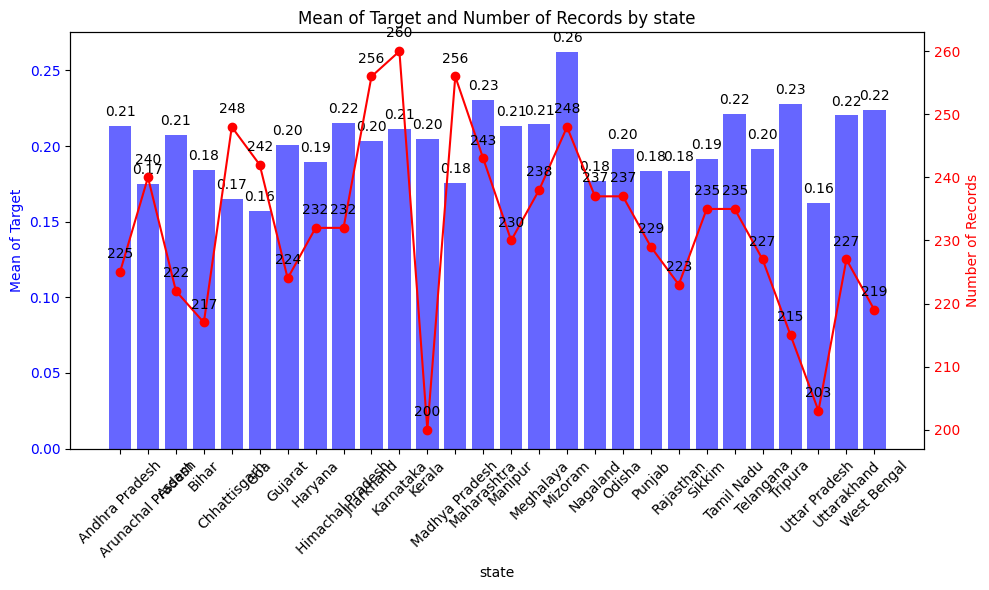

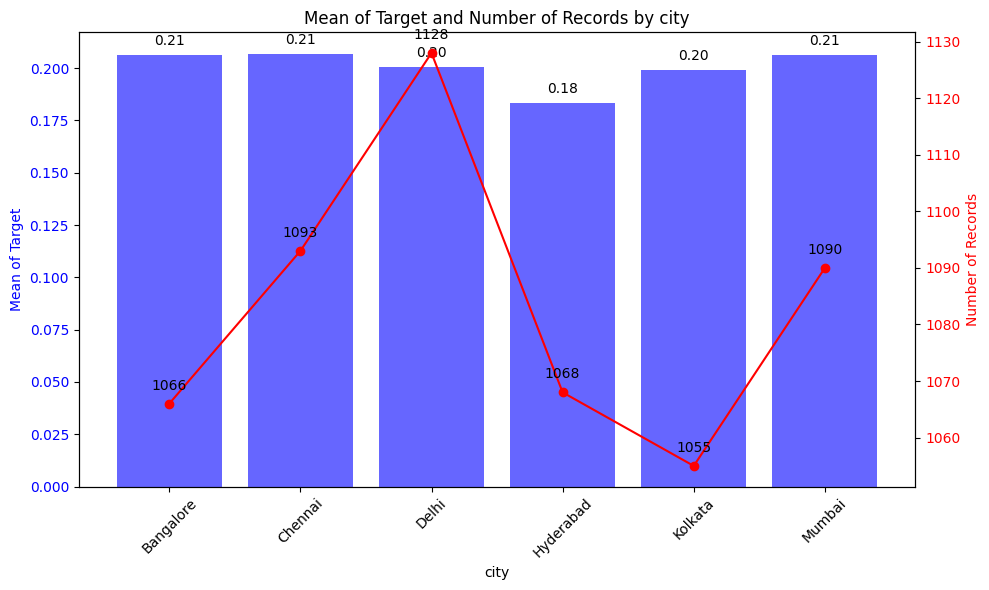

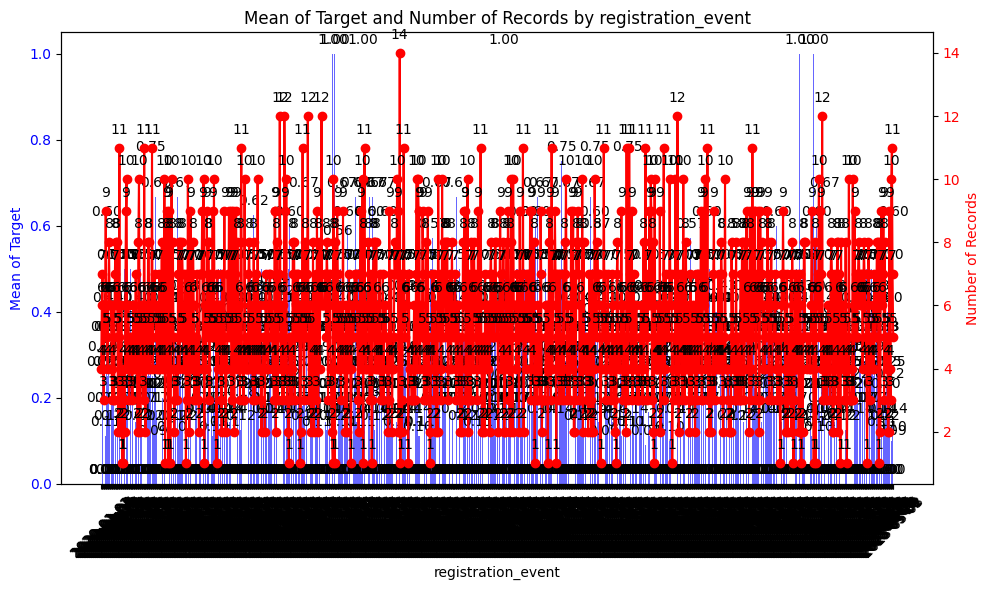

In [119]:
import matplotlib.pyplot as plt

# Loop through each object column and plot the mean of the target by each unique value in the column
for column in df.columns[df.dtypes == 'object']:
    mean_target_by_value = df.groupby(column)[target].mean()
    count_by_value = df[column].value_counts().reindex(mean_target_by_value.index)  # Get the count for each category
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot mean of the target
    ax1.bar(mean_target_by_value.index, mean_target_by_value.values, color='blue', alpha=0.6, label='Mean of Target')
    ax1.set_title(f'Mean of Target and Number of Records by {column}')
    ax1.set_ylabel('Mean of Target', color='blue')
    ax1.set_xlabel(column)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(mean_target_by_value.index, rotation=45)
    
    # Create another y-axis for the count
    ax2 = ax1.twinx()
    ax2.plot(count_by_value.index, count_by_value.values, color='red', label='Number of Records', marker='o')
    ax2.set_ylabel('Number of Records', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Display the value above each bar for mean of target
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
    
    # Display the count value next to each point
    for i, value in enumerate(count_by_value.values):
        ax2.annotate(value, 
                     (count_by_value.index[i], value), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center')
    
    fig.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
    plt.show()

In [120]:
df['registration_event'].head()

0    2020-03-16
1    2022-01-16
2    2022-01-11
3    2022-07-26
4    2020-03-11
Name: registration_event, dtype: object

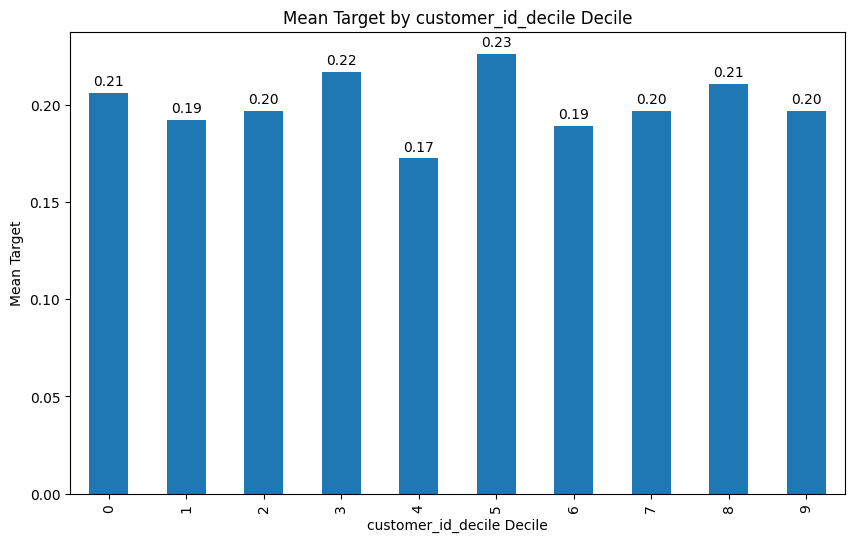

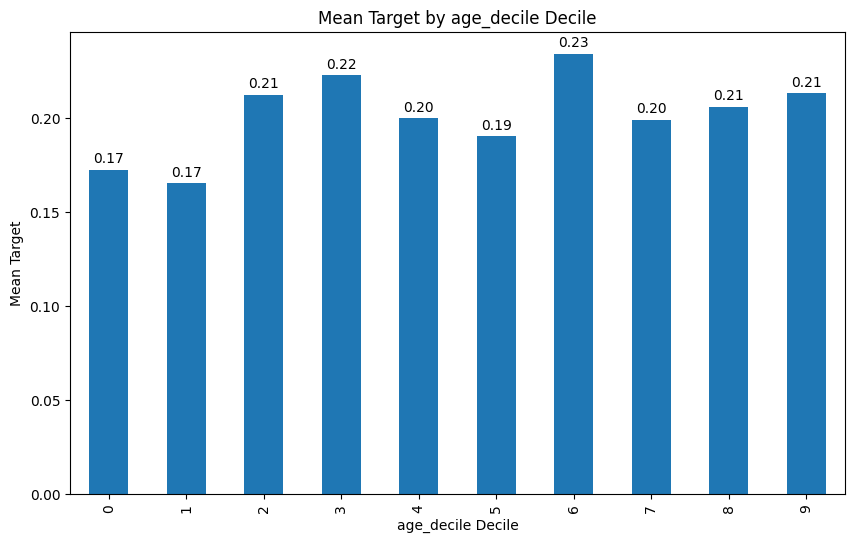

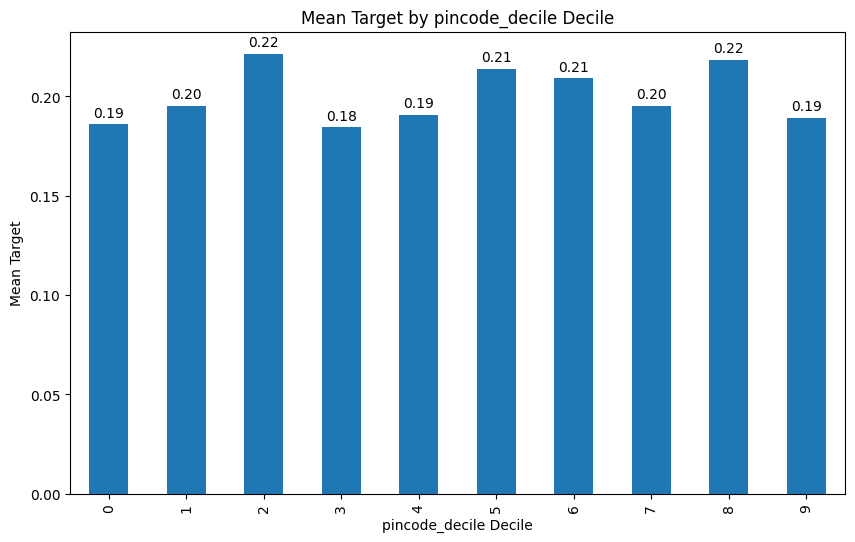

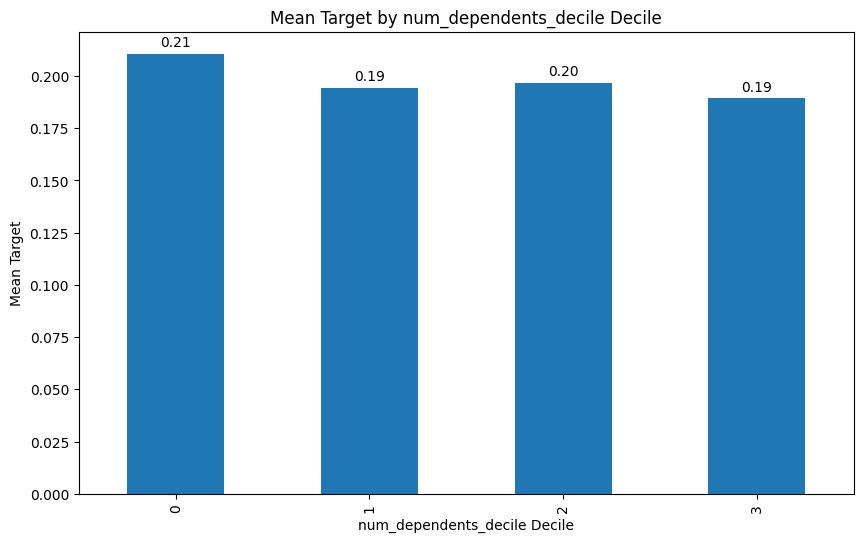

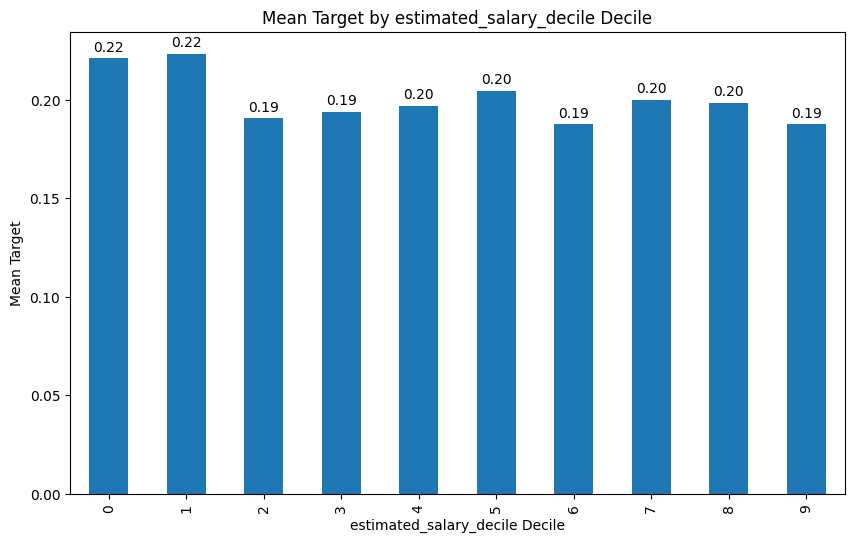

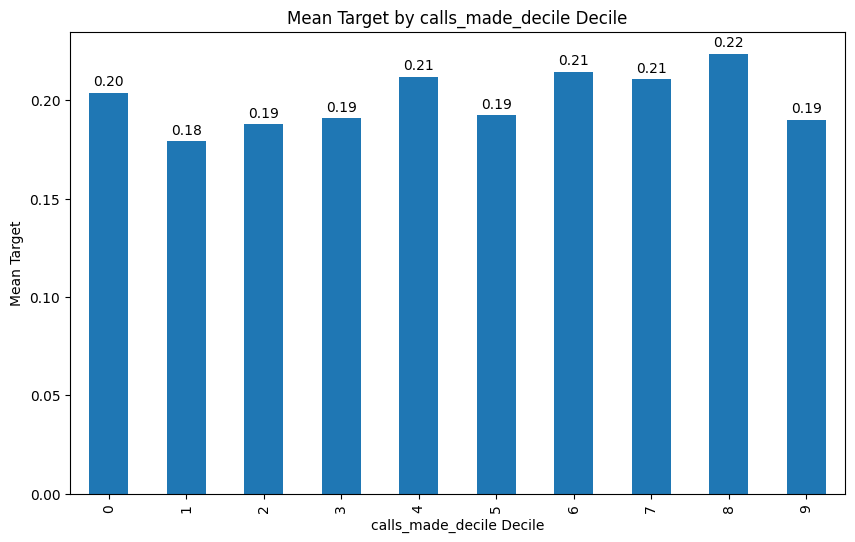

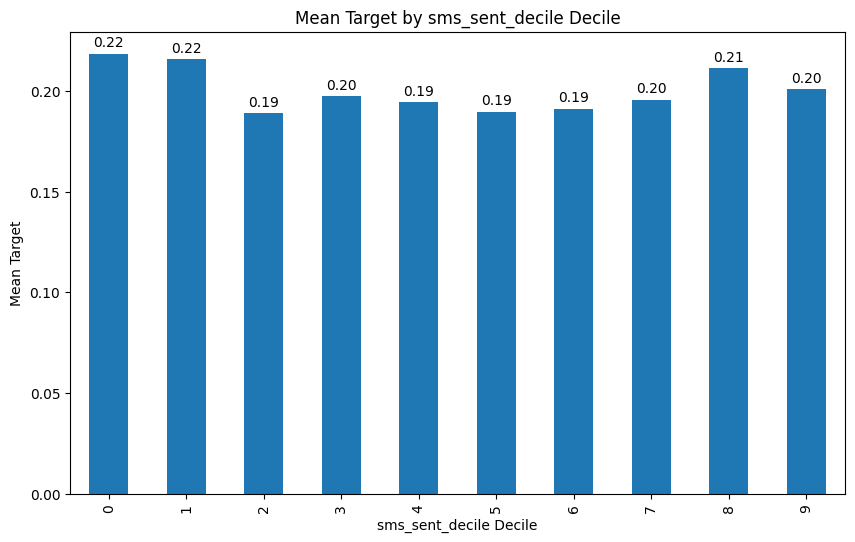

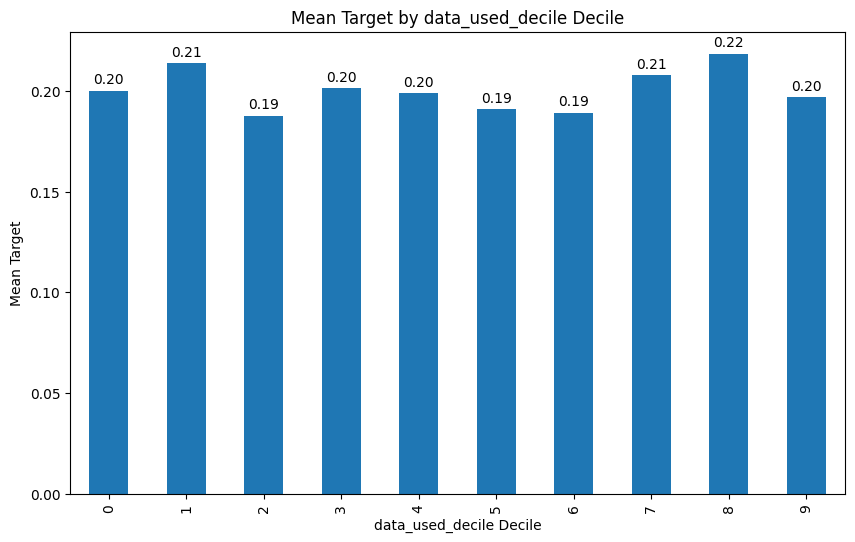

In [121]:
# Identify numeric columns in the dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'target' from the list of numeric columns as we don't want to bin this
numeric_columns.remove(target)

# Create a new dataframe to store binned values and the target
df_binned = pd.DataFrame()

for col in numeric_columns:
    # Bin the numeric columns into deciles
    # Ensure col is converted to string in case it's not
    df_binned[str(col) + '_decile'] = pd.qcut(df[col], 10, duplicates='drop', labels=False)

df_binned[target] = df[target]  # Add the target column to the binned dataframe

# Calculate the mean of the target for each bin and plot
for col in df_binned.columns[:-1]:  # Exclude the last column which is 'target'
    mean_target_by_bin = df_binned.groupby(col)[target].mean()
    plt.figure(figsize=(10, 6))
    bars = mean_target_by_bin.plot(kind='bar')
    plt.title(f'Mean Target by {col} Decile')
    plt.xlabel(f'{col} Decile')
    plt.ylabel('Mean Target')
    
    # Add the mean value above each bar
    for bar in bars.patches:
        plt.annotate(format(bar.get_height(), '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                     size=10, xytext=(0, 8),
                     textcoords='offset points')
    plt.show()

In [122]:
# Create dummies (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Print the new DataFrame's shape
print("Shape with dummies: {}".format(df.shape))

Shape with dummies: (6500, 1260)


In [123]:
# Feature Scaling
scaler = StandardScaler()

# 'customer_id' is not a feature
features = df.drop(['customer_id', 'churn'], axis=1)
features_scaled = scaler.fit_transform(features)

# Target variable
target = df['churn']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)




In [124]:
# Define a dict of models to be applied and to capture the results
models ={"LogisticRegression" : LogisticRegression(random_state=42),
         "RandomForest" : RandomForestClassifier(random_state=42)}
results = []

# Metrics for Classification
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]

In [125]:
# Initialize an empty list to store results
results_df = []

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  y_pred_probs = model.predict_proba(X_test)[:, 1]

  # Show Parameters
  print(name)
  params = model.get_params()  
  print(params)  

  # Calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')
  roc_auc = roc_auc_score(y_test, y_pred_probs)  
      
  # Append the results to the list
  results_df.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": roc_auc, "Params" : params})
   
  # Calculate the confusion matrix
  print(confusion_matrix(y_test, y_pred))

  # Calculate the classification report
  print(classification_report(y_test, y_pred))

  # Store predictions
  if name == "LogisticRegression":
    logreg_pred = y_pred
  else:
    rf_pred = y_pred

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_df)

# Display the results
results_df

LogisticRegression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[[920 107]
 [245  28]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1027
           1       0.21      0.10      0.14       273

    accuracy                           0.73      1300
   macro avg       0.50      0.50      0.49      1300
weighted avg       0.67      0.73      0.69      1300

RandomForest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Params
0,LogisticRegression,0.729231,0.207407,0.102564,0.137255,0.502046,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,RandomForest,0.790769,1.000000,0.003663,0.007299,0.494489,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


In [126]:
# Best model 
higher_accuracy = "RandomForest"